In [24]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install osmnx

  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: networkx
    Found existing installation: networkx 2.7.1
    Uninstalling networkx-2.7.1:
      Successfully uninstalled networkx-2.7.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [61]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import statsmodels as st
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import sklearn.linear_model
import datetime
import time
from geopy.distance import geodesic
import networkx as nx

# Question 1

In [27]:
#Import data
df1 = pd.read_csv(r"A:\Wichtig\CiSTUP\bike_data_new.csv")
df1.head()

,trip_id,started_at,ended_at,start_lat,start_lng,end_lat,end_lng
0,1,01-02-2023 00:03,01-02-2023 00:13,38.905470,-77.002130,38.906299,-76.983221
1,2,01-02-2023 00:06,01-02-2023 00:19,38.907693,-77.071512,38.909858,-77.038566
2,3,01-02-2023 00:07,01-02-2023 00:14,38.915544,-77.038252,38.916137,-77.022003
3,4,01-02-2023 00:07,01-02-2023 00:26,38.909701,-77.085646,38.935839,-77.106913
4,5,01-02-2023 00:10,01-02-2023 00:20,38.905509,-77.065246,38.898302,-77.046913


In [28]:
df1.shape

(6867, 7)

In [29]:
df1.dtypes

trip_id         int64
started_at     object
ended_at       object
start_lat     float64
start_lng     float64
end_lat       float64
end_lng       float64
dtype: object

In [30]:
df1.isna().sum()

trip_id       0
started_at    0
ended_at      0
start_lat     0
start_lng     0
end_lat       0
end_lng       0
dtype: int64

# 1

In [38]:
start_time = time.time()

# convert the timestamp columns to datetime format
df1['started_at'] = pd.to_datetime(df1['started_at'])
df1['ended_at'] = pd.to_datetime(df1['ended_at'])

# calculate the time difference between the two columns
df1['time_diff'] = df1['ended_at'] - df1['started_at']

# remove rows with time_diff = 0
df2 = df1[df1['time_diff'].dt.total_seconds() > 0]

min_duration_trips = df2[df2['time_diff'] == df2['time_diff'].min()]
# count the number of rows in the filtered DataFrame
num_min_duration_trips = len(min_duration_trips)

# compare start location and end location using latitude and longitude
df2['same_location'] = (df2['start_lat'] == df2['end_lat']) & (df2['start_lng'] == df2['end_lng'])

end_time = time.time()
total_time = end_time - start_time

# print the result
print("The shape of datframe after removing trips with 0 duration:", df2.shape)
print("Maximum duration is:", df2['time_diff'].max())
print("Minimum duration is:", df2['time_diff'].min())
print("Number of min duration trips:", num_min_duration_trips)
print("Percentage of circular trips=", (len(df1[df1['same_location'] == True])*100)/len(df2))
print("Total runtime:", total_time, "seconds")

The shape of datframe after removing trips with 0 duration: (6821, 9)
Maximum duration is: 0 days 08:38:00
Minimum duration is: 0 days 00:01:00
Number of min duration trips: 89
Percentage of circular trips= 3.0347456384694325
Total runtime: 1.2518627643585205 seconds


C:\Users\ashwe\AppData\Local\Temp\ipykernel_26424\3014157905.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['same_location'] = (df2['start_lat'] == df2['end_lat']) & (df2['start_lng'] == df2['end_lng'])


# 2

In [44]:
# filter the DataFrame to include only trips starting between 06:00 AM and 06:00 PM
df3 = df1[(df1['started_at'].dt.hour >= 6) & (df1['started_at'].dt.hour < 18)]
# print the filtered DataFrame
df3.head()

,trip_id,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,same_location,time_diff
122,123,2023-01-02 06:00:00,2023-01-02 06:05:00,38.900427,-76.988250,38.902932,-76.998405,False,0 days 00:05:00
123,124,2023-01-02 06:01:00,2023-01-02 06:10:00,38.887320,-76.983569,38.899942,-76.994897,False,0 days 00:09:00
124,125,2023-01-02 06:02:00,2023-01-02 06:05:00,38.860000,-77.050000,38.860000,-77.050000,True,0 days 00:03:00
125,126,2023-01-02 06:02:00,2023-01-02 06:14:00,38.889365,-77.077294,38.888255,-77.049436,False,0 days 00:12:00
126,127,2023-01-02 06:02:00,2023-01-02 06:15:00,38.807040,-77.059817,38.832431,-77.049772,False,0 days 00:13:00


In [58]:
start_time = time.time()
# create a copy of the DataFrame sorted by end_time
df_sorted = df3.sort_values('ended_at')

# initialize a counter for feasible pairs
num_feasible_pairs = 0

# iterate over each row in the sorted DataFrame
for i, row in df_sorted.iterrows():
    # check if there is a feasible pair with this row
    feasible_pair = df_sorted[(df_sorted['start_lat'] == row['end_lat']) & 
                              (df_sorted['start_lng'] == row['end_lng']) & 
                              (df_sorted['started_at'] >= row['ended_at'])]
    # increment the counter if there is a feasible pair
    num_feasible_pairs += len(feasible_pair)
    
end_time = time.time()
total_time = end_time - start_time

print("Total number of feasible pairs of trips:", num_feasible_pairs)
print("Total runtime:", total_time, "seconds")

Total number of feasible pairs of trips: 45207
Total runtime: 22.01861333847046 seconds


# 3

In [62]:
df4 = df1.head(100)
df4.tail()

,trip_id,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,same_location,time_diff
95,96,2023-01-02 05:45:00,2023-01-02 05:49:00,38.920000,-77.050000,38.900000,-77.050000,False,0 days 00:04:00
96,97,2023-01-02 05:45:00,2023-01-02 05:55:00,38.873755,-77.089233,38.887010,-77.095257,False,0 days 00:10:00
97,98,2023-01-02 05:45:00,2023-01-02 05:55:00,38.893410,-77.076348,38.905711,-77.047318,False,0 days 00:10:00
98,99,2023-01-02 05:46:00,2023-01-02 05:47:00,38.876300,-77.003700,38.875010,-77.002400,False,0 days 00:01:00
99,100,2023-01-02 05:46:00,2023-01-02 06:15:00,38.907444,-76.986813,38.892441,-77.048947,False,0 days 00:29:00


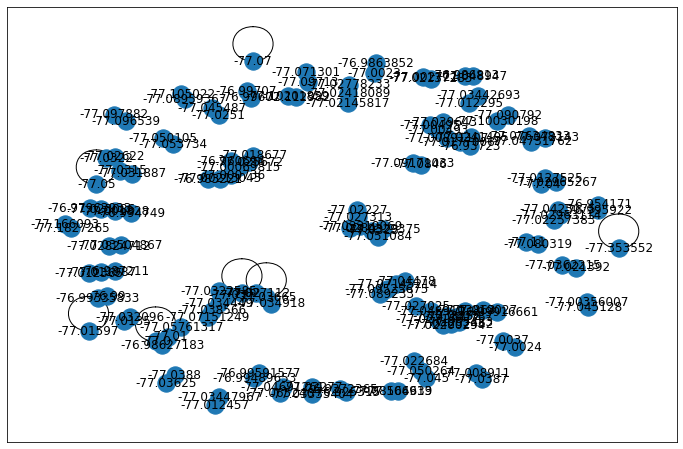

In [63]:
df = nx.from_pandas_edgelist(df4, source='start_lng', target='end_lng', edge_attr=True)

plt.figure(figsize=(12,8))
nx.draw_networkx(df, with_labels=True)

In [ ]:
shortest_path_distance = nx.dijkstra_path(df, source=  , target=, weight='Distance')